In [36]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
# Load the data file
file_path = '../data/Myocardial infarction complications Database.csv'
data = pd.read_csv(file_path)

# remove the columns corresponding to other complications that we do not want to predict
data = data.drop('KFK_BLOOD', axis=1)
data = data.drop('IBS_NASL', axis=1)
data = data.drop('LET_IS', axis=1)
data = data.drop('P_IM_STEN', axis=1)
data = data.drop('REC_IM', axis=1)
data = data.drop('DRESSLER', axis=1)
data = data.drop('RAZRIV', axis=1)
data = data.drop('OTEK_LANC', axis=1)
data = data.drop('A_V_BLOK', axis=1)
data = data.drop('FIBR_JELUD', axis=1)
data = data.drop('JELUD_TAH', axis=1)
data = data.drop('PREDS_TAH', axis=1)
data = data.drop('FIBR_PREDS', axis=1)
data = data.drop('ID', axis=1)

data = data.fillna(0)

/tmp/ipykernel_36698/2511400553.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')


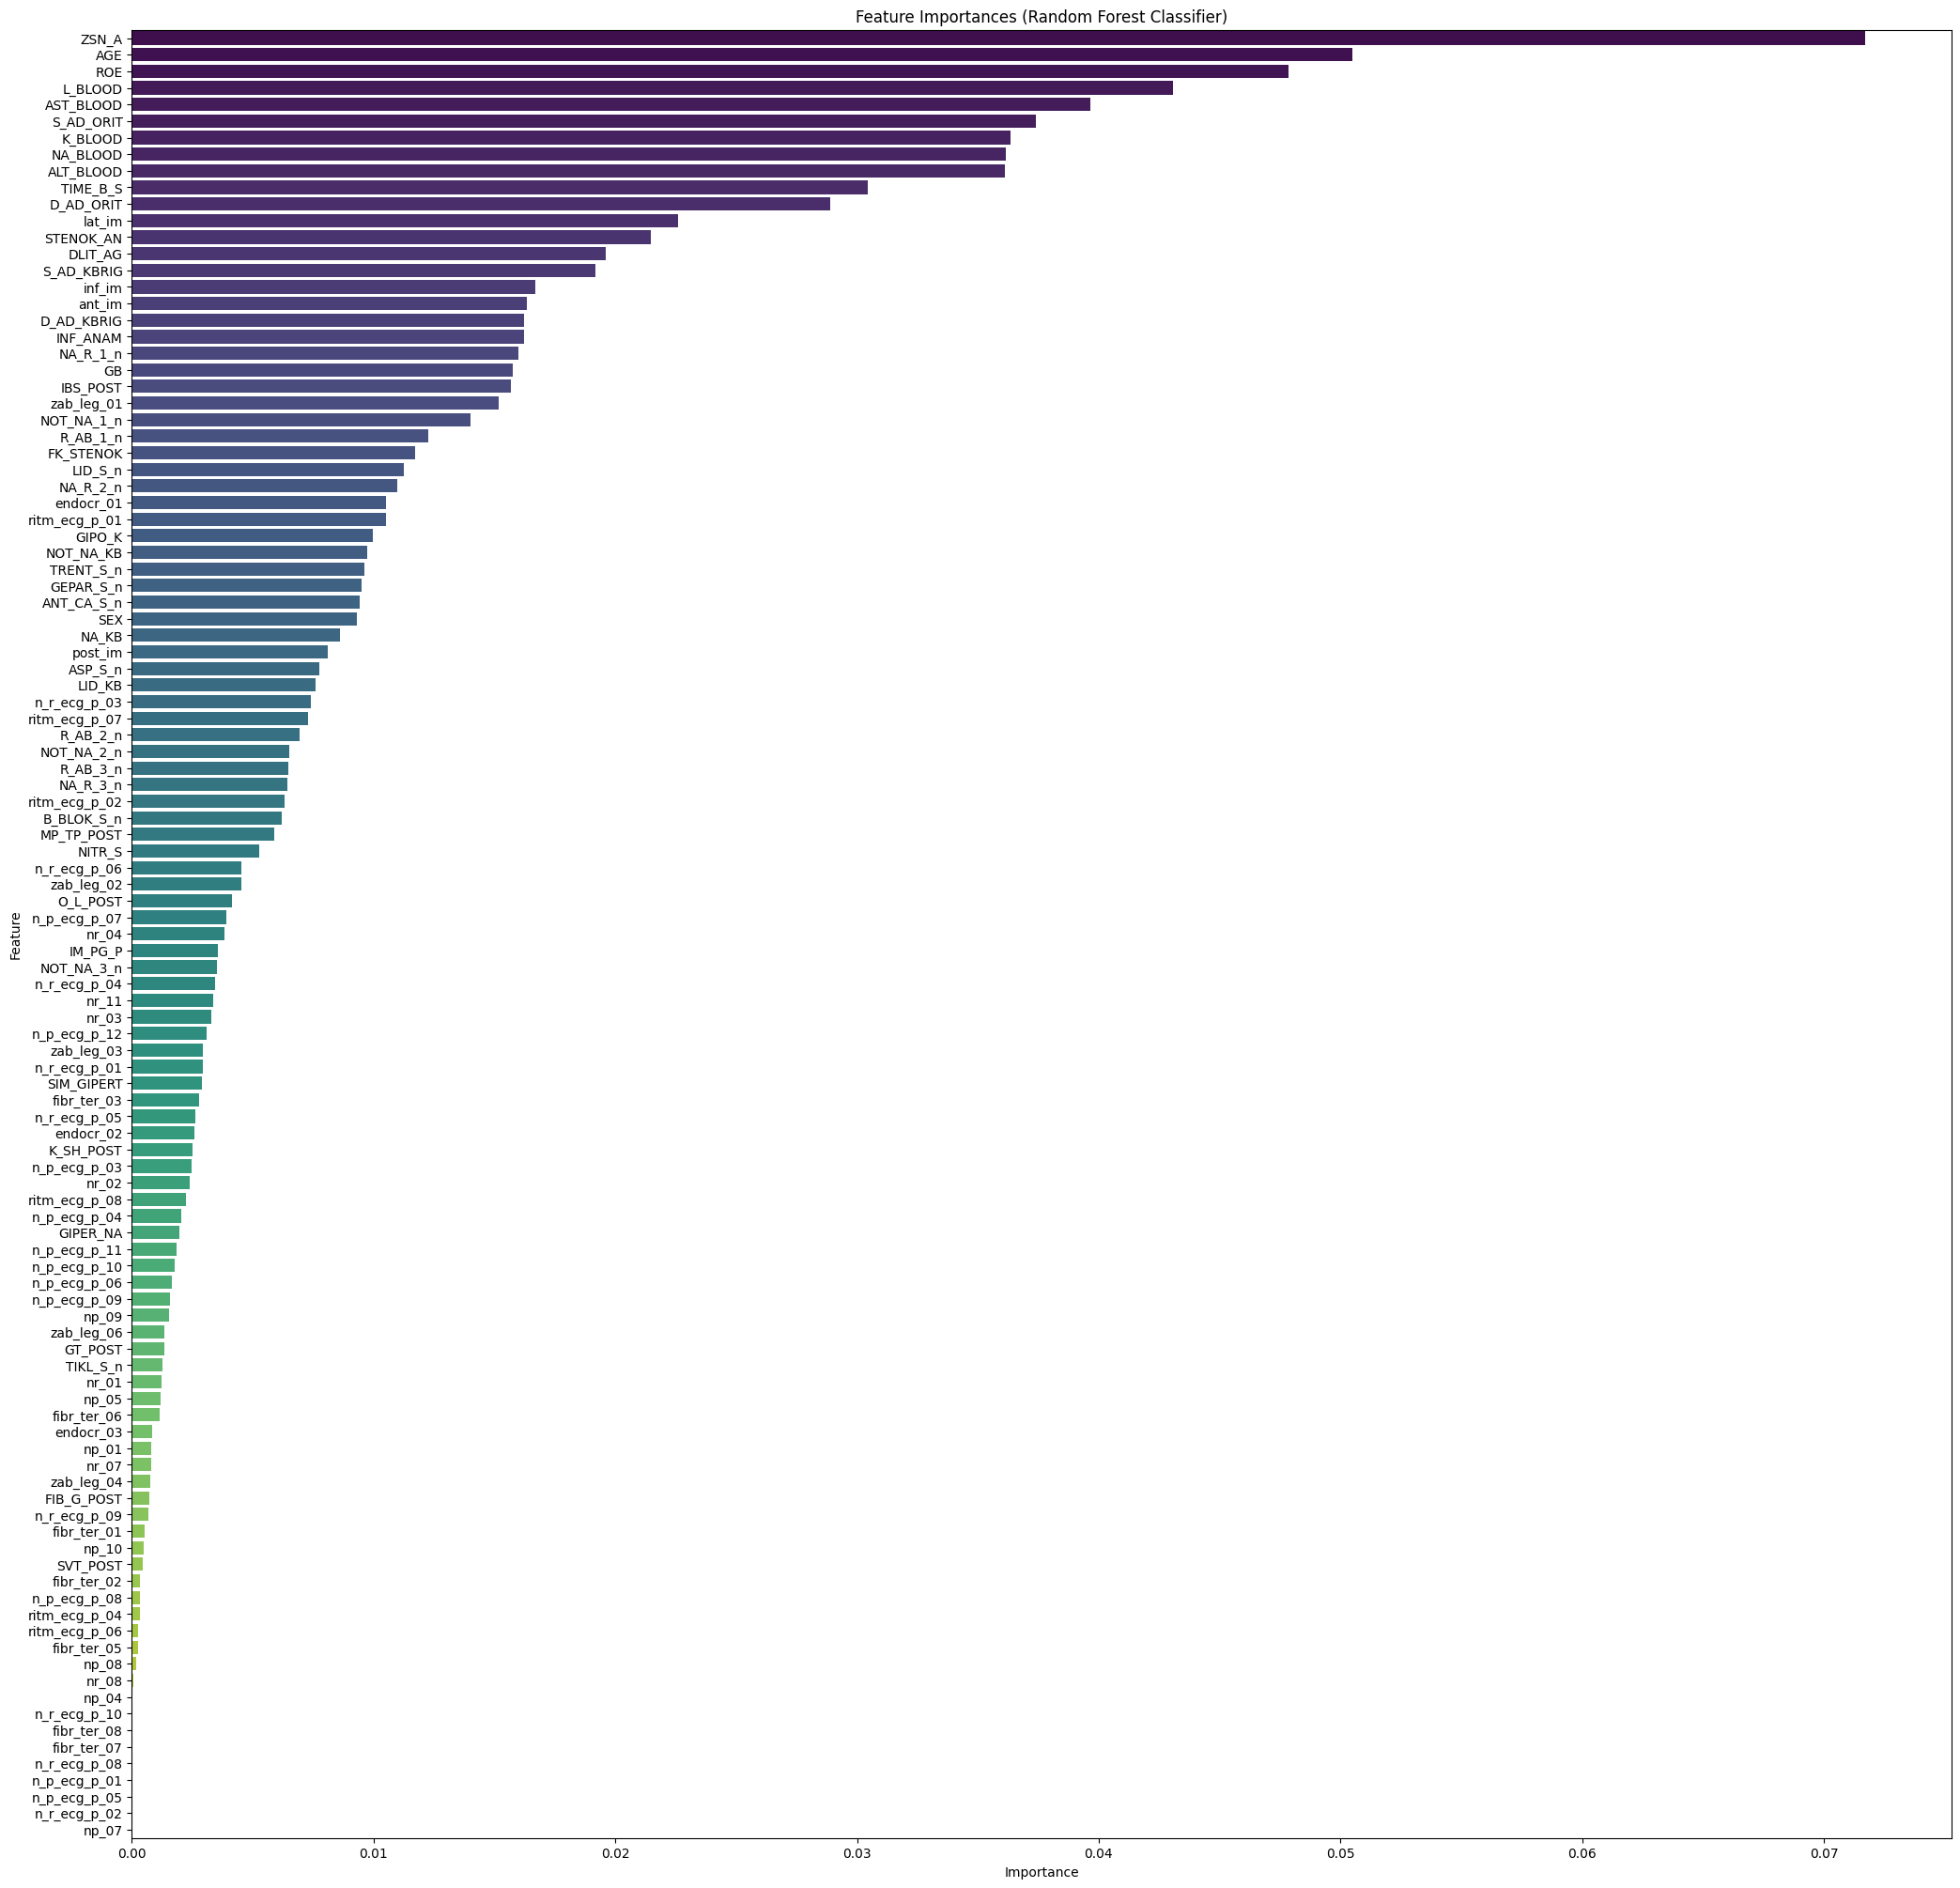

In [38]:
# Prepare data for feature importance analysis - [Extracting the target]
# Assuming the last column is the target variable and all others are features
X = data.drop('ZSN', axis=1)
one_hot_X = pd.get_dummies(X)
y = data.ZSN

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_
RandomForestClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
ax = sns.barplot(x='Importance', y='Feature', data=features, palette='viridis', errwidth=0)


plt.title('Feature Importances (Random Forest Classifier)')
plt.show()